In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
#reading dataset
data = pd.read_excel("C:/Users/MaitriDShah/Downloads/ar7/xAPI-Edu-Data.xlsx")
#converting dataset t dataframe
df = pd.DataFrame(data)
df.columns

#replacing class values to ordinal values
df['Class'].replace({'H': 3, 'M' : 2, 'L': 1}, inplace=True)


#dropping unnecessary columns
columns = ['NationalITy','PlaceofBirth','GradeID','SectionID','Relation','StudentAbsenceDays','Topic','Semester','StageID','gender','ParentAnsweringSurvey',
          'ParentschoolSatisfaction']
df.drop(columns, inplace=True, axis=1)
#dataframe after changes
df

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,2
1,20,20,3,25,2
2,10,7,0,30,1
3,30,25,5,35,1
4,40,50,12,50,2
...,...,...,...,...,...
475,5,4,5,8,1
476,50,77,14,28,2
477,55,74,25,29,2
478,30,17,14,57,1


In [3]:
#converting dataframe to list of tuples with feature name and their respective weights
# Initialize an empty list to store transactions
transactions = []

# Iterate over rows of the DataFrame
for _, row in df.iterrows():
    # Create tuples of (column name, value) for each row
    transaction = [(column, row[column]) for column in df.columns]
    # Append the transaction to the list of transactions
    transactions.append(transaction)

# Print the list of transactions
for transaction in transactions:
    print(transaction)


[('raisedhands', 15), ('VisITedResources', 16), ('AnnouncementsView', 2), ('Discussion', 20), ('Class', 2)]
[('raisedhands', 20), ('VisITedResources', 20), ('AnnouncementsView', 3), ('Discussion', 25), ('Class', 2)]
[('raisedhands', 10), ('VisITedResources', 7), ('AnnouncementsView', 0), ('Discussion', 30), ('Class', 1)]
[('raisedhands', 30), ('VisITedResources', 25), ('AnnouncementsView', 5), ('Discussion', 35), ('Class', 1)]
[('raisedhands', 40), ('VisITedResources', 50), ('AnnouncementsView', 12), ('Discussion', 50), ('Class', 2)]
[('raisedhands', 42), ('VisITedResources', 30), ('AnnouncementsView', 13), ('Discussion', 70), ('Class', 2)]
[('raisedhands', 35), ('VisITedResources', 12), ('AnnouncementsView', 0), ('Discussion', 17), ('Class', 1)]
[('raisedhands', 50), ('VisITedResources', 10), ('AnnouncementsView', 15), ('Discussion', 22), ('Class', 2)]
[('raisedhands', 12), ('VisITedResources', 21), ('AnnouncementsView', 16), ('Discussion', 50), ('Class', 2)]
[('raisedhands', 70), ('V

In [27]:
#Addigning utility values to the features as per their importance in the contribution to academic performance in student learning

transactions = transactions
external_utilities = {
        "raisedhands": 0.5,
        "VisITedResources": 0.6,
        "AnnouncementsView  ": 0.3,
        "Discussion": 0.4,
        "Class": 0.1,
    
     }



In [30]:
#Applying Two-phase to the transaction database using the utility values defined 
from operator import attrgetter
from itemset_mining.two_phase_huim import TwoPhase
#assigning minimum utility to generate best possible itemsets
minutil = 8000
hui = TwoPhase(transactions, external_utilities, minutil)
print(hui)
result = hui.get_hui()

sorted(result, key=attrgetter('itemset_utility'),reverse=True)


[HUIRecord(items=('Class', 'Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35415.699999999975),
 HUIRecord(items=('Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35318.20000000006),
 HUIRecord(items=('Class', 'VisITedResources', 'raisedhands'), itemset_utility=27105.30000000001),
 HUIRecord(items=('VisITedResources', 'raisedhands'), itemset_utility=27007.800000000032),
 HUIRecord(items=('Class', 'Discussion', 'VisITedResources'), itemset_utility=24189.699999999993),
 HUIRecord(items=('Discussion', 'VisITedResources'), itemset_utility=24092.200000000044),
 HUIRecord(items=('Class', 'Discussion', 'raisedhands'), itemset_utility=19633.899999999994),
 HUIRecord(items=('Discussion', 'raisedhands'), itemset_utility=19536.40000000001),
 HUIRecord(items=('Class', 'VisITedResources'), itemset_utility=15879.3),
 HUIRecord(items=('VisITedResources',), itemset_utility=15781.800000000016),
 HUIRecord(items=('Class', 'raisedhands'), itemset_utility=11323.500000000

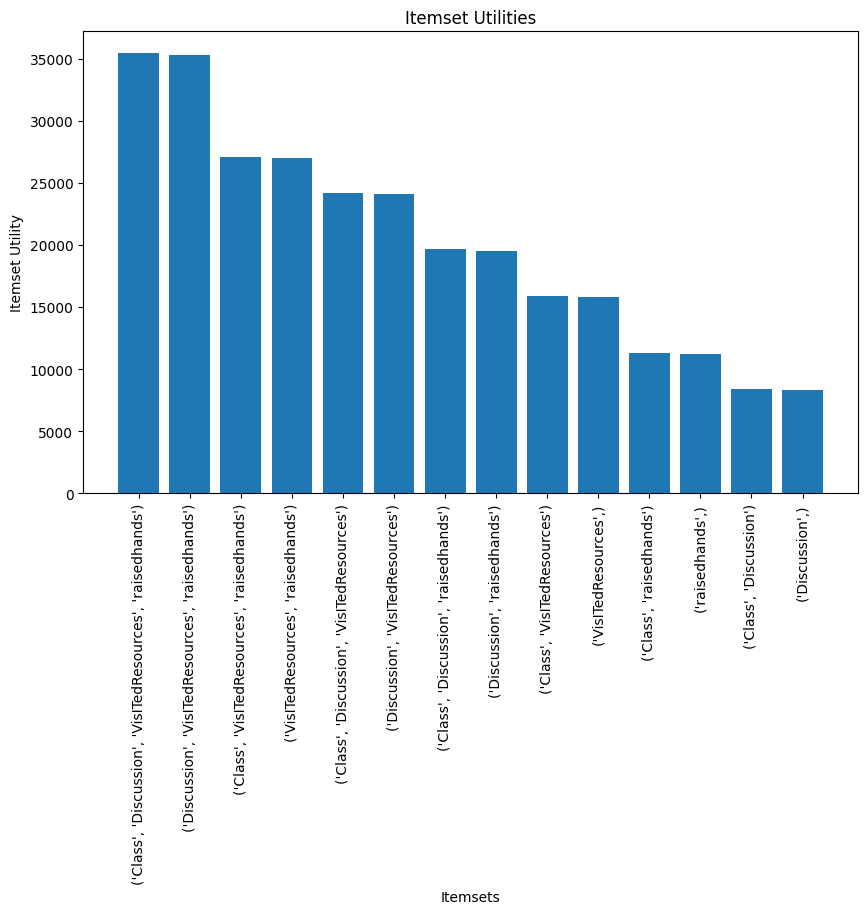

In [23]:
#comparing with other minimum utility
#plotting the graph for minimum utility= 8000
# Given output
output = [
    ('Class', 'Discussion', 'VisITedResources', 'raisedhands', 35415.699999999975),
    ('Discussion', 'VisITedResources', 'raisedhands', 35318.20000000006),
    ('Class', 'VisITedResources', 'raisedhands', 27105.30000000001),
    ('VisITedResources', 'raisedhands', 27007.800000000032),
    ('Class', 'Discussion', 'VisITedResources', 24189.699999999993),
    ('Discussion', 'VisITedResources', 24092.200000000044),
    ('Class', 'Discussion', 'raisedhands', 19633.899999999994),
    ('Discussion', 'raisedhands', 19536.40000000001),
    ('Class', 'VisITedResources', 15879.3),
    ('VisITedResources', 15781.800000000016),
    ('Class', 'raisedhands', 11323.500000000018),
    ('raisedhands', 11226.0),
    ('Class', 'Discussion', 8407.899999999998),
    ('Discussion', 8310.399999999989)
]

# Extracting items and itemset utilities
items = [tuple(record[:-1]) for record in output]
itemset_utilities = [record[-1] for record in output]

# Sorting itemset utilities based on descending order of values
sorted_indices = sorted(range(len(itemset_utilities)), key=lambda k: itemset_utilities[k], reverse=True)
sorted_itemset_utilities = [itemset_utilities[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_itemset_utilities)), sorted_itemset_utilities)
plt.xticks(range(len(sorted_itemset_utilities)), [items[i] for i in sorted_indices], rotation=90)
plt.title('Itemset Utilities')
plt.xlabel('Itemsets')
plt.ylabel('Itemset Utility')
plt.show()


In [33]:

minutil = 20000
hui = TwoPhase(transactions, external_utilities, minutil)
print(hui)
result = hui.get_hui()

sorted(result, key=attrgetter('itemset_utility'),reverse=True)



[HUIRecord(items=('Class', 'Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35415.699999999975),
 HUIRecord(items=('Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35318.20000000006),
 HUIRecord(items=('Class', 'VisITedResources', 'raisedhands'), itemset_utility=27105.30000000001),
 HUIRecord(items=('VisITedResources', 'raisedhands'), itemset_utility=27007.800000000032),
 HUIRecord(items=('Class', 'Discussion', 'VisITedResources'), itemset_utility=24189.699999999993),
 HUIRecord(items=('Discussion', 'VisITedResources'), itemset_utility=24092.200000000044)]

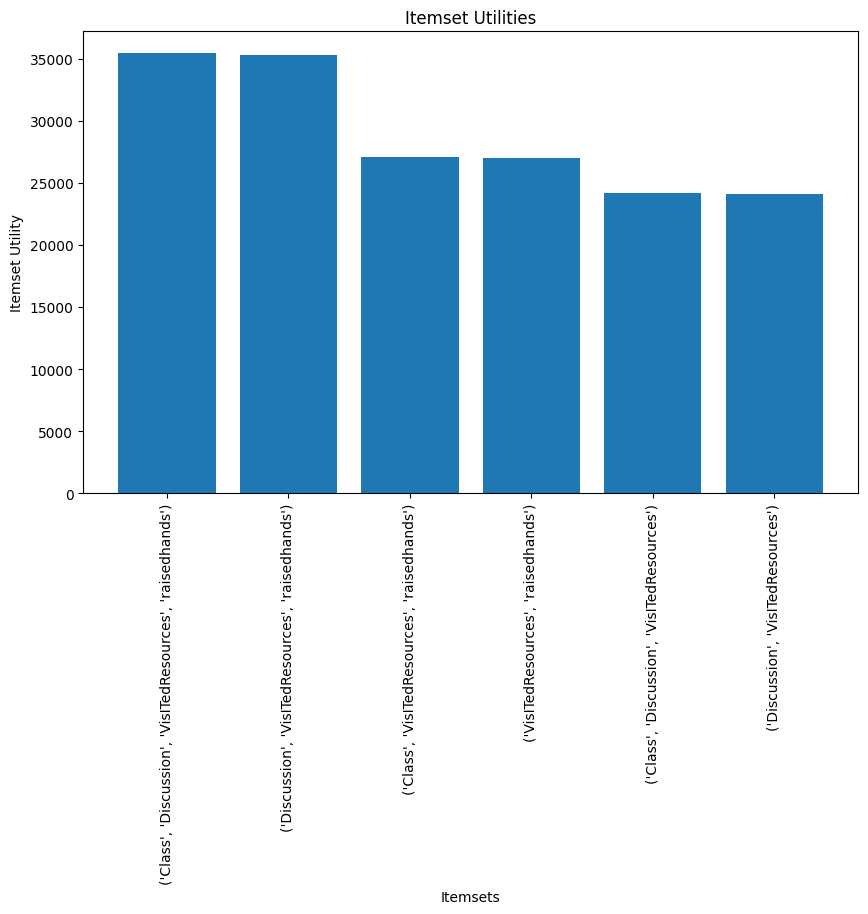

In [25]:
#plotting the graph for minimum utility= 20000

# Given output
output = [
    ('Class', 'Discussion', 'VisITedResources', 'raisedhands',35415.699999999975),
    ('Discussion', 'VisITedResources', 'raisedhands', 35318.20000000006),
    ('Class', 'VisITedResources', 'raisedhands', 27105.30000000001),
    ('VisITedResources', 'raisedhands', 27007.800000000032),
    ('Class', 'Discussion', 'VisITedResources', 24189.699999999993),
    ('Discussion', 'VisITedResources', 24092.200000000044)
]

# Extracting items and itemset utilities
items = [tuple(record[:-1]) for record in output]
itemset_utilities = [record[-1] for record in output]

# Sorting itemset utilities based on descending order of values
sorted_indices = sorted(range(len(itemset_utilities)), key=lambda k: itemset_utilities[k], reverse=True)
sorted_itemset_utilities = [itemset_utilities[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_itemset_utilities)), sorted_itemset_utilities)
plt.xticks(range(len(sorted_itemset_utilities)), [items[i] for i in sorted_indices], rotation=90)
plt.title('Itemset Utilities')
plt.xlabel('Itemsets')
plt.ylabel('Itemset Utility')
plt.show()


In [32]:

minutil = 0
hui = TwoPhase(transactions, external_utilities, minutil)
print(hui)
result = hui.get_hui()

sorted(result, key=attrgetter('itemset_utility'),reverse=True)



[HUIRecord(items=('Class', 'Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35415.699999999975),
 HUIRecord(items=('Discussion', 'VisITedResources', 'raisedhands'), itemset_utility=35318.20000000006),
 HUIRecord(items=('Class', 'VisITedResources', 'raisedhands'), itemset_utility=27105.30000000001),
 HUIRecord(items=('VisITedResources', 'raisedhands'), itemset_utility=27007.800000000032),
 HUIRecord(items=('Class', 'Discussion', 'VisITedResources'), itemset_utility=24189.699999999993),
 HUIRecord(items=('Discussion', 'VisITedResources'), itemset_utility=24092.200000000044),
 HUIRecord(items=('Class', 'Discussion', 'raisedhands'), itemset_utility=19633.899999999994),
 HUIRecord(items=('Discussion', 'raisedhands'), itemset_utility=19536.40000000001),
 HUIRecord(items=('Class', 'VisITedResources'), itemset_utility=15879.3),
 HUIRecord(items=('VisITedResources',), itemset_utility=15781.800000000016),
 HUIRecord(items=('Class', 'raisedhands'), itemset_utility=11323.500000000

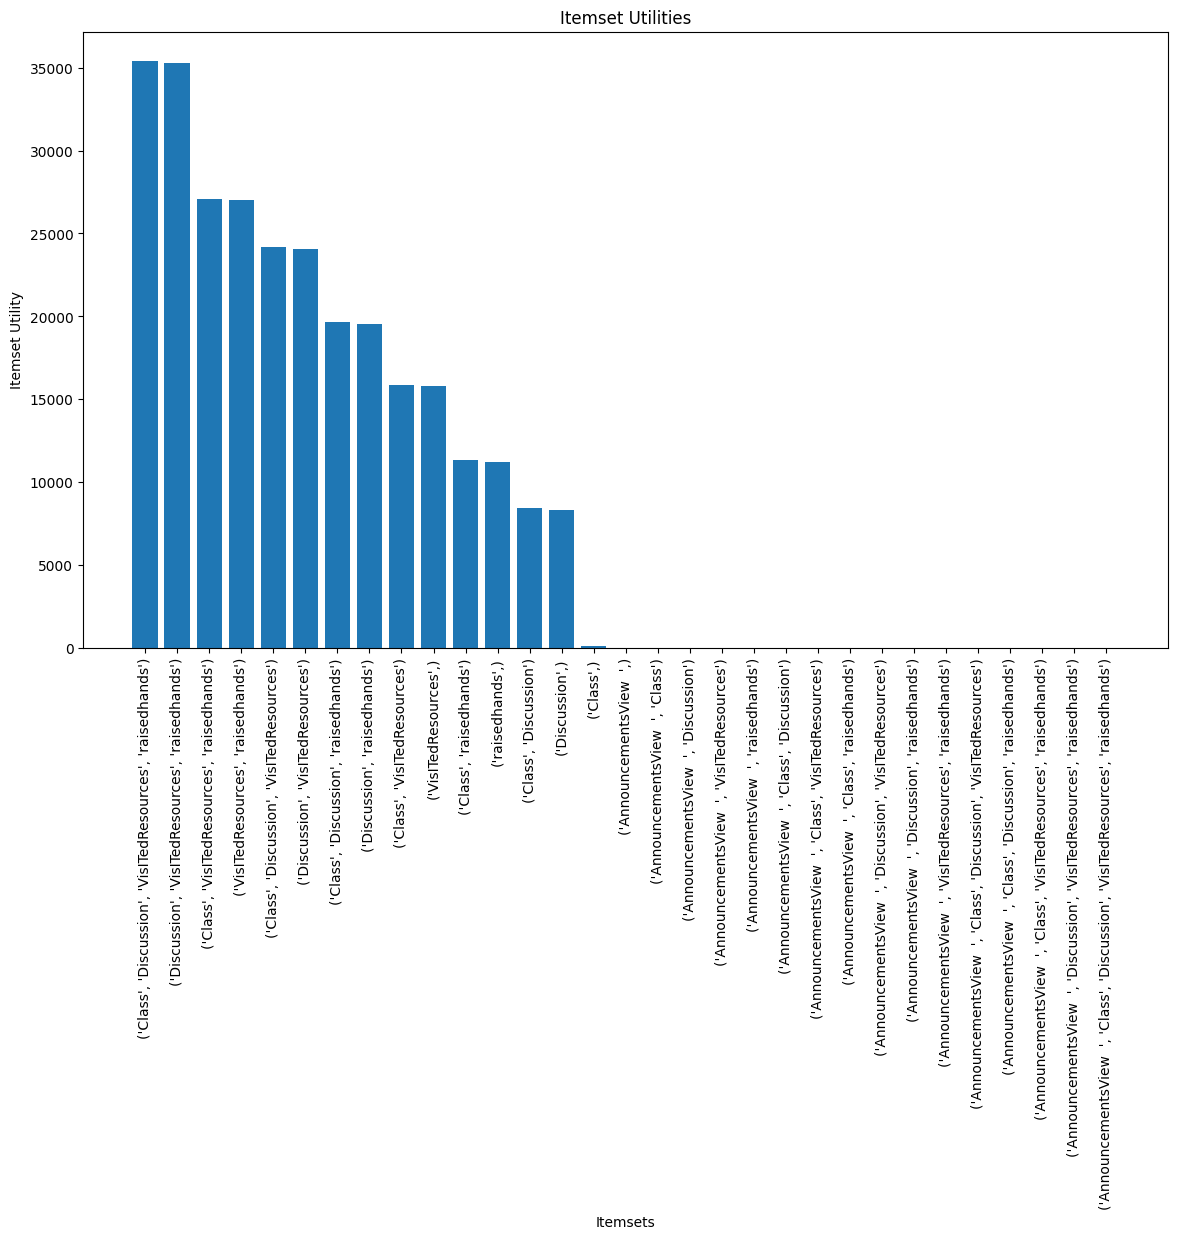

In [29]:
#plotting the graph for minimum utility= 20000


# Given output
output = [
    ('Class', 'Discussion', 'VisITedResources', 'raisedhands', 35415.699999999975),
    ('Discussion', 'VisITedResources', 'raisedhands', 35318.20000000006),
    ('Class', 'VisITedResources', 'raisedhands', 27105.30000000001),
    ('VisITedResources', 'raisedhands', 27007.800000000032),
    ('Class', 'Discussion', 'VisITedResources', 24189.699999999993),
    ('Discussion', 'VisITedResources', 24092.200000000044),
    ('Class', 'Discussion', 'raisedhands', 19633.899999999994),
    ('Discussion', 'raisedhands', 19536.40000000001),
    ('Class', 'VisITedResources', 15879.3),
    ('VisITedResources', 15781.800000000016),
    ('Class', 'raisedhands', 11323.500000000018),
    ('raisedhands', 11226.0),
    ('Class', 'Discussion', 8407.899999999998),
    ('Discussion', 8310.399999999989),
    ('Class', 97.49999999999994),
    ('AnnouncementsView  ', 0),
    ('AnnouncementsView  ', 'Class', 0),
    ('AnnouncementsView  ', 'Discussion', 0),
    ('AnnouncementsView  ', 'VisITedResources', 0),
    ('AnnouncementsView  ', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Class', 'Discussion', 0),
    ('AnnouncementsView  ', 'Class', 'VisITedResources', 0),
    ('AnnouncementsView  ', 'Class', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Discussion', 'VisITedResources', 0),
    ('AnnouncementsView  ', 'Discussion', 'raisedhands', 0),
    ('AnnouncementsView  ', 'VisITedResources', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Class', 'Discussion', 'VisITedResources', 0),
    ('AnnouncementsView  ', 'Class', 'Discussion', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Class', 'VisITedResources', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Discussion', 'VisITedResources', 'raisedhands', 0),
    ('AnnouncementsView  ', 'Class', 'Discussion', 'VisITedResources', 'raisedhands', 0)
]

# Extracting items and itemset utilities
items = [tuple(record[:-1]) for record in output]
itemset_utilities = [record[-1] for record in output]

# Sorting itemset utilities based on descending order of values
sorted_indices = sorted(range(len(itemset_utilities)), key=lambda k: itemset_utilities[k], reverse=True)
sorted_itemset_utilities = [itemset_utilities[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(range(len(sorted_itemset_utilities)), sorted_itemset_utilities)
plt.xticks(range(len(sorted_itemset_utilities)), [items[i] for i in sorted_indices], rotation=90)
plt.title('Itemset Utilities')
plt.xlabel('Itemsets')
plt.ylabel('Itemset Utility')
plt.show()


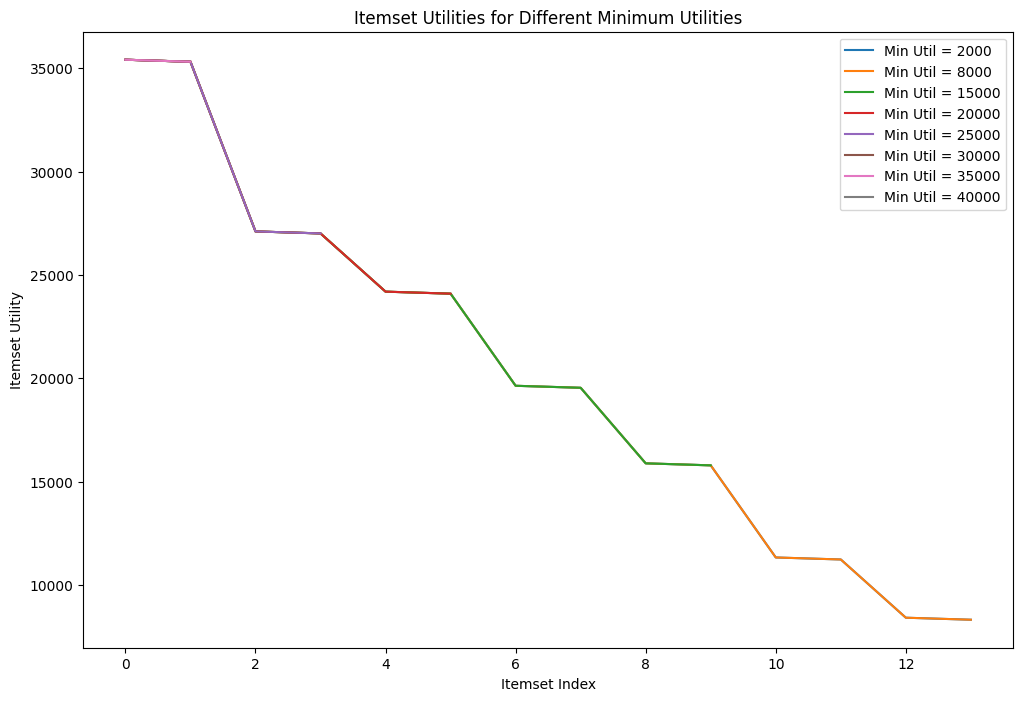

In [36]:
#plotting itemset size and multiple utilities to define best utility

# Define the list of minimum utility values
min_utils = [2000, 8000, 15000, 20000, 25000, 30000, 35000, 40000]

# Initialize an empty list to store the results for each minimum utility
results = []

# Loop through each minimum utility value
for minutil in min_utils:
    # Apply Two-phase algorithm with the current minimum utility value
    hui = TwoPhase(transactions, external_utilities, minutil)
    result = hui.get_hui()
    results.append(sorted(result, key=attrgetter('itemset_utility'), reverse=True))

# Plotting
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    # Extracting itemset utilities for the current minimum utility
    itemset_utilities = [item.itemset_utility for item in result]
    # Plotting the itemset utilities
    plt.plot(itemset_utilities, label=f'Min Util = {min_utils[i]}')

plt.title('Itemset Utilities for Different Minimum Utilities')
plt.xlabel('Itemset Index')
plt.ylabel('Itemset Utility')
plt.legend()
plt.grid(False)
plt.show()
